In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.5
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
# layer的简单使用
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100,input_shape=[None,5])
layer(tf.zeros([10,5]))

<tf.Tensor: id=29, shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 

In [3]:
# layer.variables
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-0.12055848, -0.22332491, -0.2154498 , -0.00450221,  0.13271461,
          0.08795674,  0.02099876,  0.15230434, -0.2218704 ,  0.2351617 ,
         -0.0971802 ,  0.03206395,  0.16929753,  0.16598608, -0.19390771,
         -0.10553285, -0.17661229,  0.23258348, -0.12843148, -0.16263244,
         -0.06755978,  0.1398087 ,  0.16919215, -0.1374251 , -0.10259596,
          0.22019438,  0.01355328, -0.21319167,  0.11235292, -0.04362975,
         -0.08432817, -0.22759014,  0.09022109,  0.02126913,  0.10384877,
         -0.16077921, -0.03300045,  0.2007324 , -0.0219163 , -0.04117848,
         -0.18533689,  0.21882771,  0.05150668, -0.19967443, -0.10322209,
          0.23027383,  0.12974484, -0.00309466, -0.14830089,  0.22305317,
         -0.0386553 , -0.19641067, -0.01095103,  0.1316484 , -0.18637325,
          0.07125412, -0.11774645, -0.06602405, -0.09606428,  0.06434362,
          0.04015072, -0.12213457, -0.2335

In [4]:
from sklearn.datasets import fetch_california_housing

# 房价预测
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
# 划分样本
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [23]:
# 没有参数层次的定义
# tf.nn.softplus:log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
# 使用
print(customized_softplus([-10.,-5.,0.,5.,10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [24]:
# customized dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    
    
    def __init__(self,units,activation=None,**kwargs):
        self.units = units
        self.activation=keras.layers.Activation(activation)
        super(CustomizedDenseLayer,self).__init__(**kwargs)
    
    def build(self,input_shape):
        """构建所需要的参数"""
        
        self.kernel = self.add_weight(name="kernel",shape=(input_shape[1],self.units),initializer='uniform',trainable=True)
        
        self.bias = self.add_weight(name="bias",shape=(self.units,),initializer='zeros',trainable=True)
        
#         super(CustomizedDenseLayer,self).build(input_shape)
        super(CustomizedDenseLayer,self).build(input_shape)
        
    def call(self,x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)
        

# 搭建模型
model = keras.models.Sequential([
    CustomizedDenseLayer(30,activation='relu',input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,# 自定义激活函数层,和一下两种情况等价
    # keras.layers.Dense(1,activation="softplus")
    # keras.layers.Dense(1),keras.layers.Activation('softplus'),
])

# 打印model信息
model.summary()
# 编译
model.compile(loss='mean_squared_error',optimizer="sgd")
# 回调函数
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_4 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_5 (Cu (None, 1)                 31        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [25]:
#训练
history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=100,callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 115us/sample - loss: 1.2075 - val_loss: 0.6694
Epoch 2/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5817 - val_loss: 0.5752
Epoch 3/100
11610/11610 [==============================] - 1s 88us/sample - loss: 0.5084 - val_loss: 0.5112
Epoch 4/100
11610/11610 [==============================] - 1s 82us/sample - loss: 0.4681 - val_loss: 0.4754
Epoch 5/100
11610/11610 [==============================] - 1s 87us/sample - loss: 0.4522 - val_loss: 0.4599
Epoch 6/100
11610/11610 [==============================] - 1s 87us/sample - loss: 0.4390 - val_loss: 0.4521
Epoch 7/100
11610/11610 [==============================] - 1s 87us/sample - loss: 0.4467 - val_loss: 0.4765
Epoch 8/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4267 - val_loss: 0.4355
Epoch 9/100
11610/11610 [==============================] - 1s 88us/sample - loss: 0.40

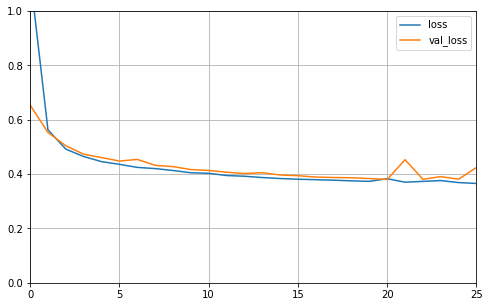

In [20]:
# 学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)


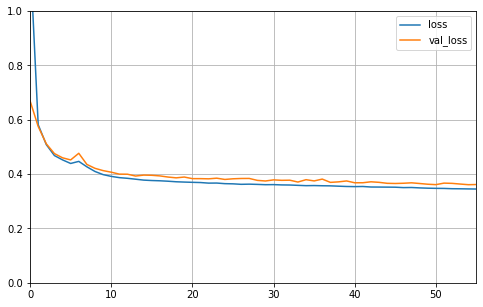

In [26]:
plot_learning_curves(history)

In [22]:
model.evaluate(x_test_scaled,y_test,verbose=2)

5160/1 - 0s - loss: 0.4823


0.3944745316061863